In [46]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
# Importing Libraries

In [47]:
f = open("/content/dialogs.txt",'r')
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [48]:
df = pd.read_csv('/content/dialogs.txt', names=('Query','Response'), sep='\t')

In [49]:
df.head()

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


# Data Understanding

In [50]:
df.shape
# There are 3725 rows and 2 columns in our dialogs.txt dataset

(3725, 2)

In [51]:
df.columns
# Displaying all the columns of our dataset

Index(['Query', 'Response'], dtype='object')

In [52]:
df.info()
# Checking the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [53]:
df.describe()
# Describe functions shows us the frequency, unique and counts of all columns

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [54]:
df.nunique()
# Returns number of unique elements in the object.

Query       3510
Response    3512
dtype: int64

In [55]:
df.isnull().any()

Query       False
Response    False
dtype: bool

In [56]:
df.isnull().sum()
# Checking for the presence of null values in the data.

Query       0
Response    0
dtype: int64

In [57]:
df['Query'].value_counts()
# Checking the coounts of the values present in the columns 'Query'

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [58]:
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

# Data Visualization

In [59]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [61]:
Text = df['Query']
Text[0]

'hi, how are you doing?'

In [62]:
for sentence in Text:
  print(sentence)

  ss = sia.polarity_scores(sentence)
  for k in ss:
    print('{}: {}, '.format(k,ss[k]),end="\n")
    #print()

Streaming output truncated to the last 5000 lines.
i'm not sleeping here tonight.
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.0, 
what's the matter? this is a nice room.
neg: 0.0, 
neu: 0.562, 
pos: 0.438, 
compound: 0.4404, 
maybe the room is nice, but not the bed.
neg: 0.0, 
neu: 0.808, 
pos: 0.192, 
compound: 0.2263, 
what's wrong with the bed?
neg: 0.437, 
neu: 0.563, 
pos: 0.0, 
compound: -0.4767, 
look at this sheet.
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.0, 
yes?
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
compound: 0.4019, 
see those stains?
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.0, 
i sure do.
neg: 0.0, 
neu: 0.303, 
pos: 0.697, 
compound: 0.3182, 
i'm not sleeping on that sheet.
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.0, 
well, just call the front desk. they'll give us new sheets.
neg: 0.0, 
neu: 0.826, 
pos: 0.174, 
compound: 0.2732, 
i want sheets without stains on them.
neg: 0.0, 
neu: 0.794, 
pos: 0.206, 
compound: 0.0772, 
what time does your plane leave?
neg: 0.1

In [63]:
k,ss[k]

('compound', 0.6486)

In [64]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df.head()

,Query,Response,rating
0,"hi, how are you doing?",i'm fine. how about yourself?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou..."
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compou..."
3,no problem. so how have you been?,i've been great. what about you?,"{'neg': 0.495, 'neu': 0.505, 'pos': 0.0, 'comp..."
4,i've been great. what about you?,i've been good. i'm in school right now.,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp..."


In [65]:
df['rating'].apply(pd.Series)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.690,0.310,0.2023
2,0.000,0.250,0.750,0.8402
3,0.495,0.505,0.000,-0.5994
4,0.000,0.549,0.451,0.6249
...,...,...,...,...
3720,0.000,0.707,0.293,0.4404
3721,0.000,1.000,0.000,0.0000
3722,0.000,0.526,0.474,0.4019
3723,0.153,0.625,0.222,0.2500


In [66]:
df = pd.concat([df.drop(['rating'],axis=1), df['rating'].apply(pd.Series)], axis=1)

In [67]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [68]:
from wordcloud import WordCloud
# importing word cloud

In [69]:
def wordcloud(df, label):
  subset = df[df[label]==1]
  text = df.Query.values
  wc = WordCloud(background_color="black",max_words=1000)

  wc.generate(" ".join(text))

  plt.figure(figsize=(20,20))
  plt.subplot(221)
  plt.axis("off")
  plt.title("words frequented in {}".format(label),fontsize=20)
  plt.imshow(wc.recolor(colormap='gist_earth', random_state=244),alpha=0.98)
  # visualising wordcloud

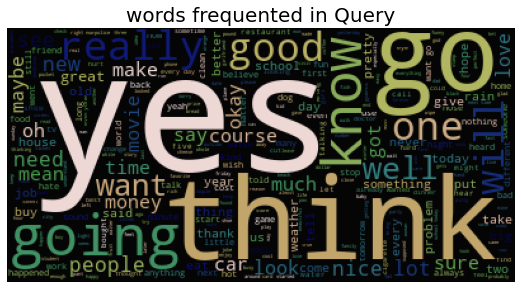

In [70]:
wordcloud(df,'Query')
# top words in the query column

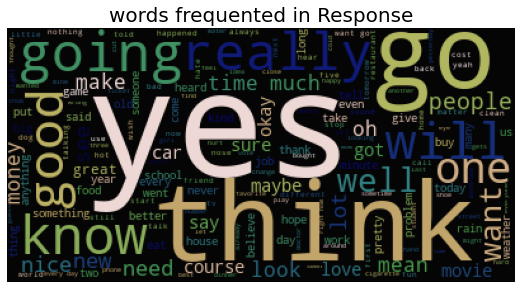

In [71]:
wordcloud(df,'Response')

# Text-Normalization

In [72]:
import re
punc_lower = lambda x:re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# lower case conversion

In [73]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [74]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [75]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [76]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [77]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column

In [78]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [79]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [80]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
5,i ve been good i m in school right now,what school do you go to,0.000,0.707,0.293,0.4404
6,what school do you go to,i go to pcc,0.000,1.000,0.000,0.0000
7,i go to pcc,do you like it there,0.000,1.000,0.000,0.0000
8,do you like it there,it s okay it s a really big campus,0.000,0.615,0.385,0.3612
9,it s okay it s a really big campus,good luck with school,0.000,0.725,0.275,0.2263


# Important Sentence

In [81]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 

In [82]:
imp_sent.head()

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


# Top Positive Sentence

In [83]:
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [84]:
pos_sent.head()

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


# Top negative sentence

In [85]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [86]:
neg_sent.head()

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


# Top Neutral Sentence

In [87]:
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [88]:
neu_sent.head()

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [90]:
factors = tfidf.fit_transform(df['Query']).toarray()

In [91]:
tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

# Application

In [92]:
from sklearn.metrics.pairwise import cosine_distances

In [93]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [101]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = lemma.lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [95]:
chatbot(query)

{'match': 'who ',
 'neg': 0.0,
 'neu': 1.0,
 'pos': 0.0,
 'response': 'two students from usc ',
 'score': 0.7676374323025994}

In [104]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

USER: who are you?
logs:
 Matched Question: 'who '
 Confidence Score: 76.76 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  two students from usc 
USER: where do you live?
logs:
 Matched Question: 'where do you live '
 Confidence Score: 100.00 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  i live in pasadena 
USER: exit
